In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
# Function to check training images
def plot_input(i):
    plt.imshow(X_train[i], cmap="binary")
    plt.title(y_train[i])
    plt.show()

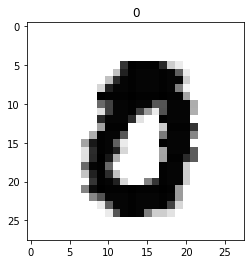

In [5]:
plot_input(69)

In [6]:
# Normalize to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Reshape image to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
# Convert to vecrtors
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [9]:
# Building the Model
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [25]:
# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)
mc = ModelCheckpoint("./trainedModel.h5",monitor="val_accuracy",verbose=1)

cb = [es,mc]

In [27]:
# Model fitting
his = model.fit(X_train, y_train, epochs = 50, validation_split=0.3,callbacks= cb)

Epoch 1/50
1309/1313 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9984
Epoch 00001: saving model to .\trainedModel.h5
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0796 - val_accuracy: 0.9896
Epoch 2/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9986
Epoch 00002: saving model to .\trainedModel.h5
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0730 - val_accuracy: 0.9912
Epoch 3/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9993
Epoch 00003: saving model to .\trainedModel.h5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0755 - val_accuracy: 0.9908
Epoch 4/50
1310/1313 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9984
Epoch 00004: saving model to .\trainedModel.h5
1313/1313 [====

In [31]:
model_save = keras.models.load_model("./trainedModel.h5")

In [34]:
score = model_save.evaluate(X_test, y_test)

print(f"Model Accuracy: {score[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0635 - accuracy: 0.9915
Model Accuracy: 0.9915000200271606
